### Importing Libraries

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

### Reading Data and Preprocessing

In [2]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(10329, 3)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [5]:
movies["genres"] = movies.genres.str.split("|")
movies["year"] = movies.title.str.extract("(\(\d\d\d\d-?\d*\))", expand=False)
movies["year"] = movies.year.str.extract("(\d\d\d\d)", expand=False).astype("Int64")
movies["title"] = movies.title.str.replace("(\(\d+-?\d*\))", "", regex=True)
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
 3   year     10327 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 333.0+ KB


In [7]:
movies.isna().sum()

movieId    0
title      0
genres     0
year       2
dtype: int64

In [8]:
movies[movies["year"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),[(no genres listed)],<NA>
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>


In [9]:
unique_genres = set()
movies.genres.apply(lambda x: unique_genres.update(x))
unique_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [10]:
movies.loc[movies.genres.str.join("|").str.contains("no genres listed"), "genres"] = np.NaN
movies[movies["genres"].isna()]

,movieId,title,genres,year
10172,126929,Li'l Quinquin ( ),NaN,<NA>
10260,135460,Pablo,NaN,2012
10280,138863,The Big Broadcast of 1936,NaN,1935
10301,141305,Round Trip to Heaven,NaN,1992
10303,141472,The 50 Year Argument,NaN,2014
10317,143709,The Take,NaN,2009
10328,149532,Marco Polo: One Hundred Eyes,NaN,2015


In [11]:
unique_genres = set()
movies.genres.apply(lambda x: unique_genres.update(x) if x is not np.NaN else None)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [12]:
# movies that contains () in title
movies.loc[list(set(movies[movies["title"].str.contains("\(")].index) - set(movies[movies["title"].str.contains("\(\w+")].index))]

,movieId,title,genres,year
953,1190,Tie Me Up! Tie Me Down! (¡Átame!),"[Crime, Drama, Romance]",1990
10322,146344,Elämältä kaiken sain ( ),"[Comedy, Drama]",<NA>
10172,126929,Li'l Quinquin ( ),NaN,<NA>


In [13]:
movies.dropna(inplace=True)
movies.isna().sum()

movieId    0
title      0
genres     0
year       0
dtype: int64

In [14]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10321 entries, 0 to 10327
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10321 non-null  int64 
 1   title    10321 non-null  object
 2   genres   10321 non-null  object
 3   year     10321 non-null  Int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 413.2+ KB


In [15]:

movies.set_index("movieId", inplace=True, drop=True)
movies = movies.merge(movies.genres.str.join("|").str.get_dummies(), left_index=True, right_index=True)
movies.drop(columns=["genres"], inplace=True)
movies.head()

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,1995,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji,1995,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale,1995,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [17]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [18]:
len(ratings)

105339

In [19]:
timestamp = []
for time in ratings["timestamp"]:
    timestamp.append(datetime.fromtimestamp(time))
ratings["timestamp"] = timestamp
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])
ratings["timestamp"] = ratings["timestamp"].dt.year
ratings.rename(columns={"timestamp": "rating_year"}, inplace=True)
ratings.head()

,userId,movieId,rating,rating_year
0,1,16,4.0,2008
1,1,24,1.5,2008
2,1,32,4.0,2008
3,1,47,4.0,2008
4,1,50,4.0,2008


In [20]:
print(ratings.shape)
for removed_movie in set(ratings.movieId.unique()) - set(ratings.movieId.unique()).intersection(set(movies.index)):
    ratings.drop(ratings[ratings["movieId"] == removed_movie].index, inplace=True)
print(ratings.shape)

(105339, 4)
(105331, 4)


In [21]:
ratings = ratings.join(movies, on="movieId")
ratings.head()

,userId,movieId,rating,rating_year,title,year,Action,Adventure,Animation,Children,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,16,4.0,2008,Casino,1995,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,24,1.5,2008,Powder,1995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,32,4.0,2008,Twelve Monkeys (a.k.a. 12 Monkeys),1995,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1,47,4.0,2008,Seven (a.k.a. Se7en),1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,50,4.0,2008,"Usual Suspects, The",1995,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [22]:
ratings.shape

(105331, 25)

In [23]:
movies_data = ratings

### Exploratory Data Analysis

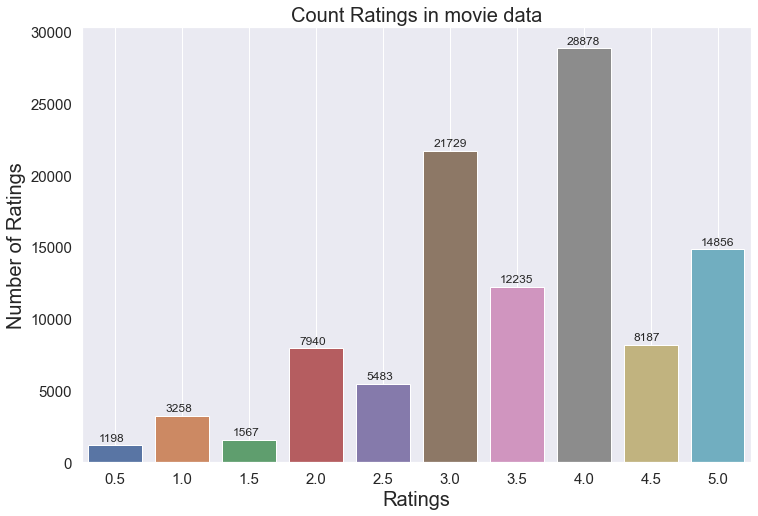

In [24]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="rating", data=movies_data)
for q in ax.patches:
    ax.annotate(str(q.get_height()), (q.get_x() + 0.15 , q.get_height() + 300))
plt.tick_params(labelsize = 15)
plt.title("Count Ratings in movie data", fontsize = 20)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Number of Ratings", fontsize = 20)
plt.grid()

In [25]:
movies_ratings_mean = movies_data.groupby("movieId")[["rating"]].mean().rename(columns={"rating": "rating_mean"})
movies_ratings_count = movies_data.groupby("movieId")[["rating"]].count().rename(columns={"rating": "watch_count"})

In [26]:
movie_statistics = pd.concat([movies_ratings_mean, movies_ratings_count], axis=1)
movie_statistics = movies.join(movie_statistics, on="movieId")
movie_statistics.sort_values(by=["watch_count","rating_mean"], ascending=False, inplace=True)
movie_statistics.head(10)

,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_mean,watch_count
movieId,,,,,,,,,,,,,,,,,,,,,
296,Pulp Fiction,1994,0,0,0,0,1,1,0,1,...,0,0,0,0,0,1,0,0,4.160000,325.0
356,Forrest Gump,1994,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,4.138264,311.0
318,"Shawshank Redemption, The",1994,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,4.454545,308.0
480,Jurassic Park,1993,1,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,3.659864,294.0
593,"Silence of the Lambs, The",1991,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,4.194828,290.0
260,Star Wars: Episode IV - A New Hope,1977,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,4.188645,273.0
2571,"Matrix, The",1999,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,4.264368,261.0
589,Terminator 2: Judgment Day,1991,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.960474,253.0
527,Schindler's List,1993,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4.296371,248.0


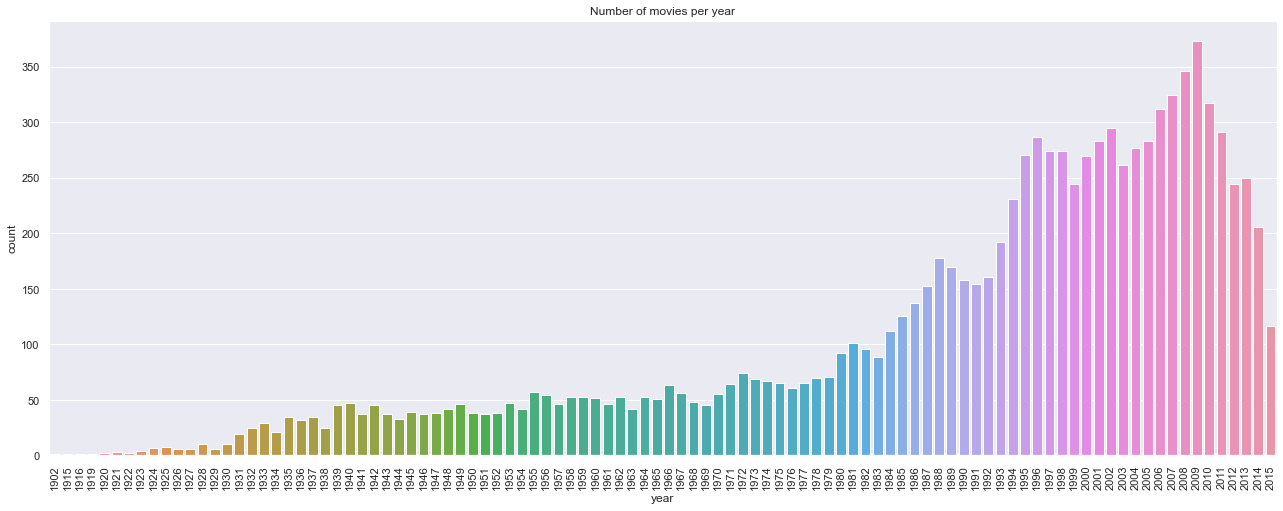

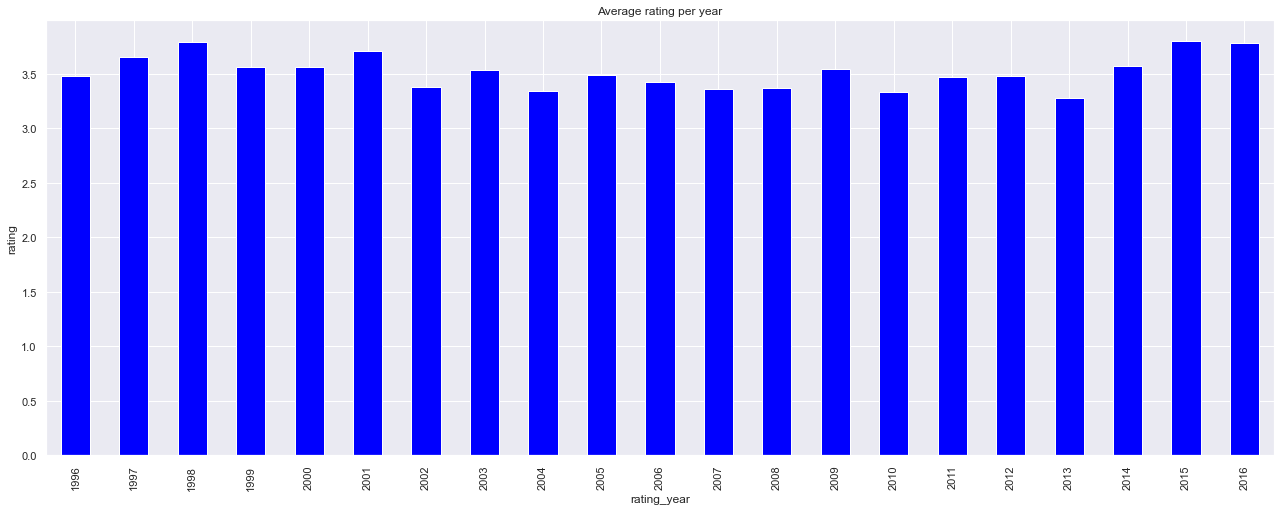

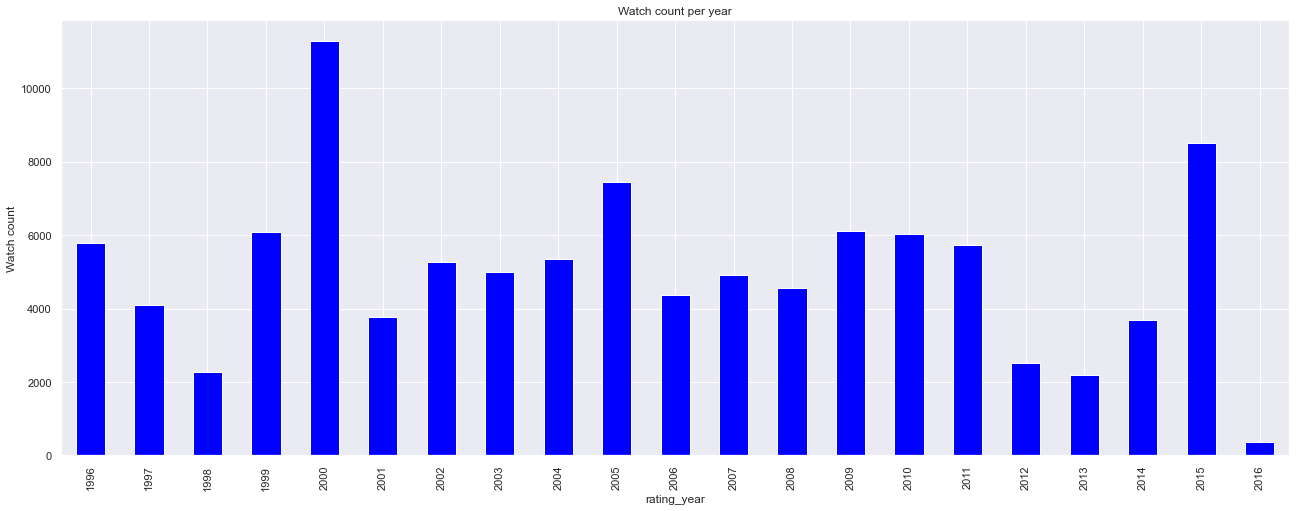

In [27]:
plt.figure(figsize=(22, 8))
sns.countplot(x="year", data=movie_statistics)
plt.xticks(rotation=90)
plt.title("Number of movies per year")
plt.show()

plt.figure(figsize=(22, 8))
movies_data.groupby("rating_year")["rating"].mean().plot(kind="bar", color="blue")
plt.title("Average rating per year")
plt.ylabel("rating")
plt.show()

plt.figure(figsize=(22, 8))
movies_data.groupby("rating_year")["rating"].count().plot(kind="bar", color="blue")
plt.title("Watch count per year")
plt.ylabel("Watch count")
plt.show()

<AxesSubplot:>

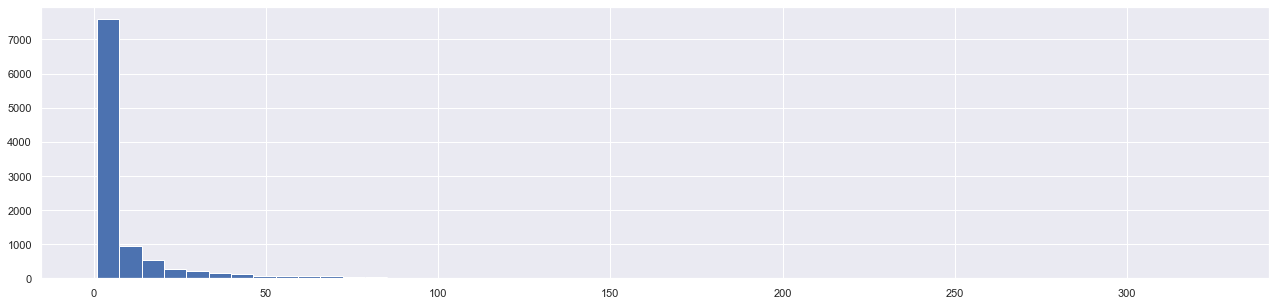

In [28]:
plt.figure(figsize=(22,5))
movie_statistics['watch_count'].hist(bins=50)

<AxesSubplot:>

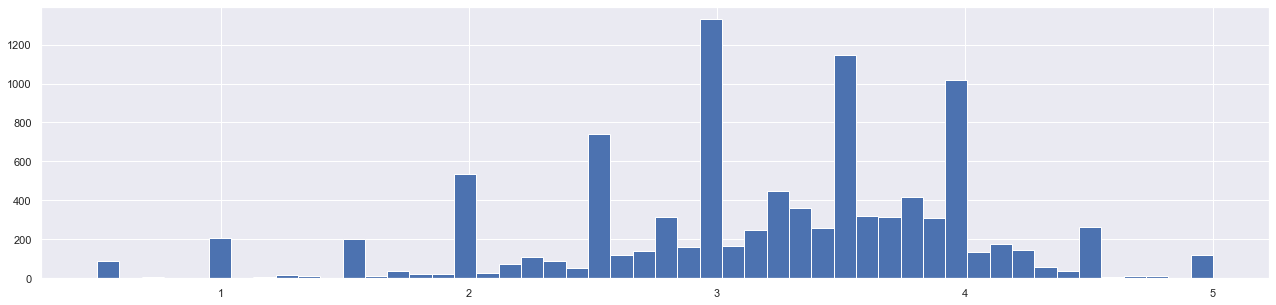

In [29]:
plt.figure(figsize=(22,5))
movie_statistics['rating_mean'].hist(bins=50)

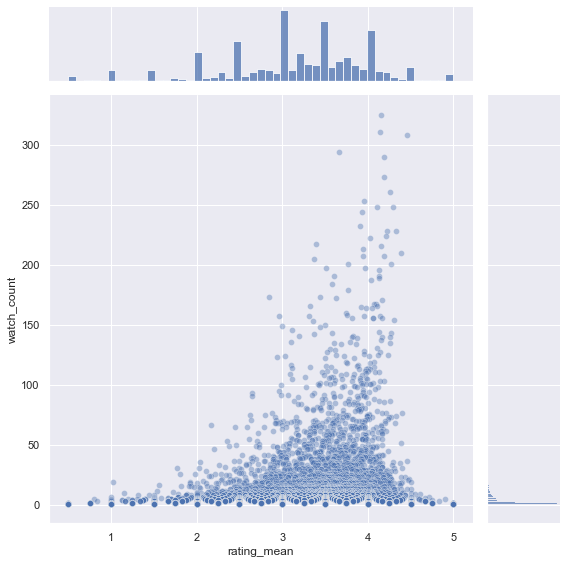

In [30]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_mean', y='watch_count', data=movie_statistics, alpha=0.4,height=8)

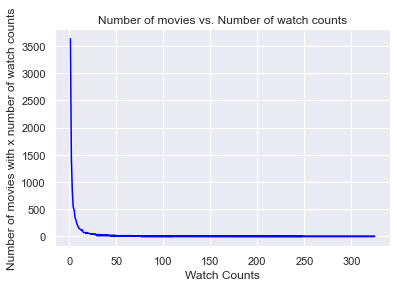

In [31]:
watch_count = movies_data.groupby("movieId")["rating"].count()
watch_value_count = watch_count.value_counts()
plt.xlabel("Watch Counts")
plt.ylabel("Number of movies with x number of watch counts")
plt.title("Number of movies vs. Number of watch counts")
plt.plot(watch_value_count.index, watch_value_count.values, color="blue")

In [32]:
watch_value_count

1      3630
2      1455
3       838
4       539
5       484
       ... 
165       1
131       1
154       1
171       1
110       1
Name: rating, Length: 184, dtype: int64

The above plots and data anlysis shows that there are over 3600 movies which are watched only once, 1455 movies that are watched only twice, so on. This data confuses us in the rating average and needs to be removed. 

In [33]:
movies_with_watch_count_less_than_25 = watch_count[watch_count < 25].index
movies_with_watch_count_less_than_25 = list(movies_with_watch_count_less_than_25)
len(movies_with_watch_count_less_than_25)

9253

In [34]:
movies.drop(movies_with_watch_count_less_than_25, axis=0, inplace=True)
movies_data.drop(movies_data[movies_data["movieId"].isin(movies_with_watch_count_less_than_25)].index, axis=0, inplace=True)
movie_statistics.drop(movies_with_watch_count_less_than_25, axis=0, inplace=True)

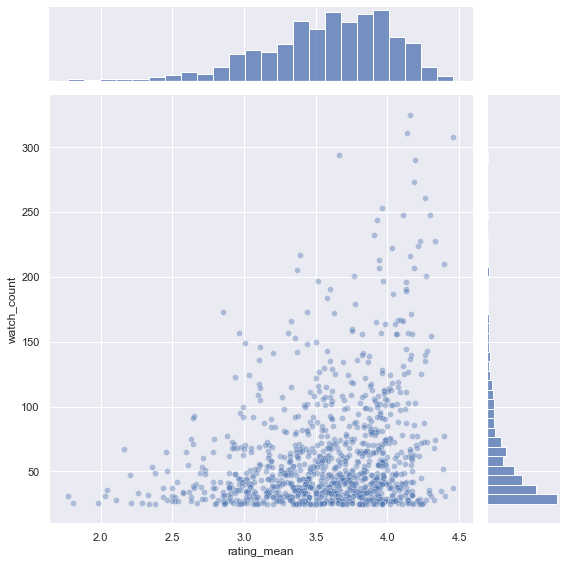

In [35]:
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating_mean', y='watch_count', data=movie_statistics, alpha=0.4,height=8)

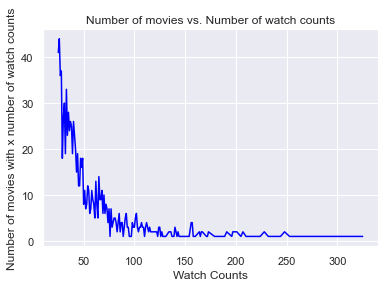

In [36]:
watch_count = movies_data.groupby("movieId")["rating"].count()
watch_value_count = watch_count.value_counts()
watch_value_count = watch_value_count[watch_value_count.index.sort_values()]
plt.xlabel("Watch Counts")
plt.ylabel("Number of movies with x number of watch counts")
plt.title("Number of movies vs. Number of watch counts")
plt.plot(watch_value_count.index, watch_value_count.values, color="blue")

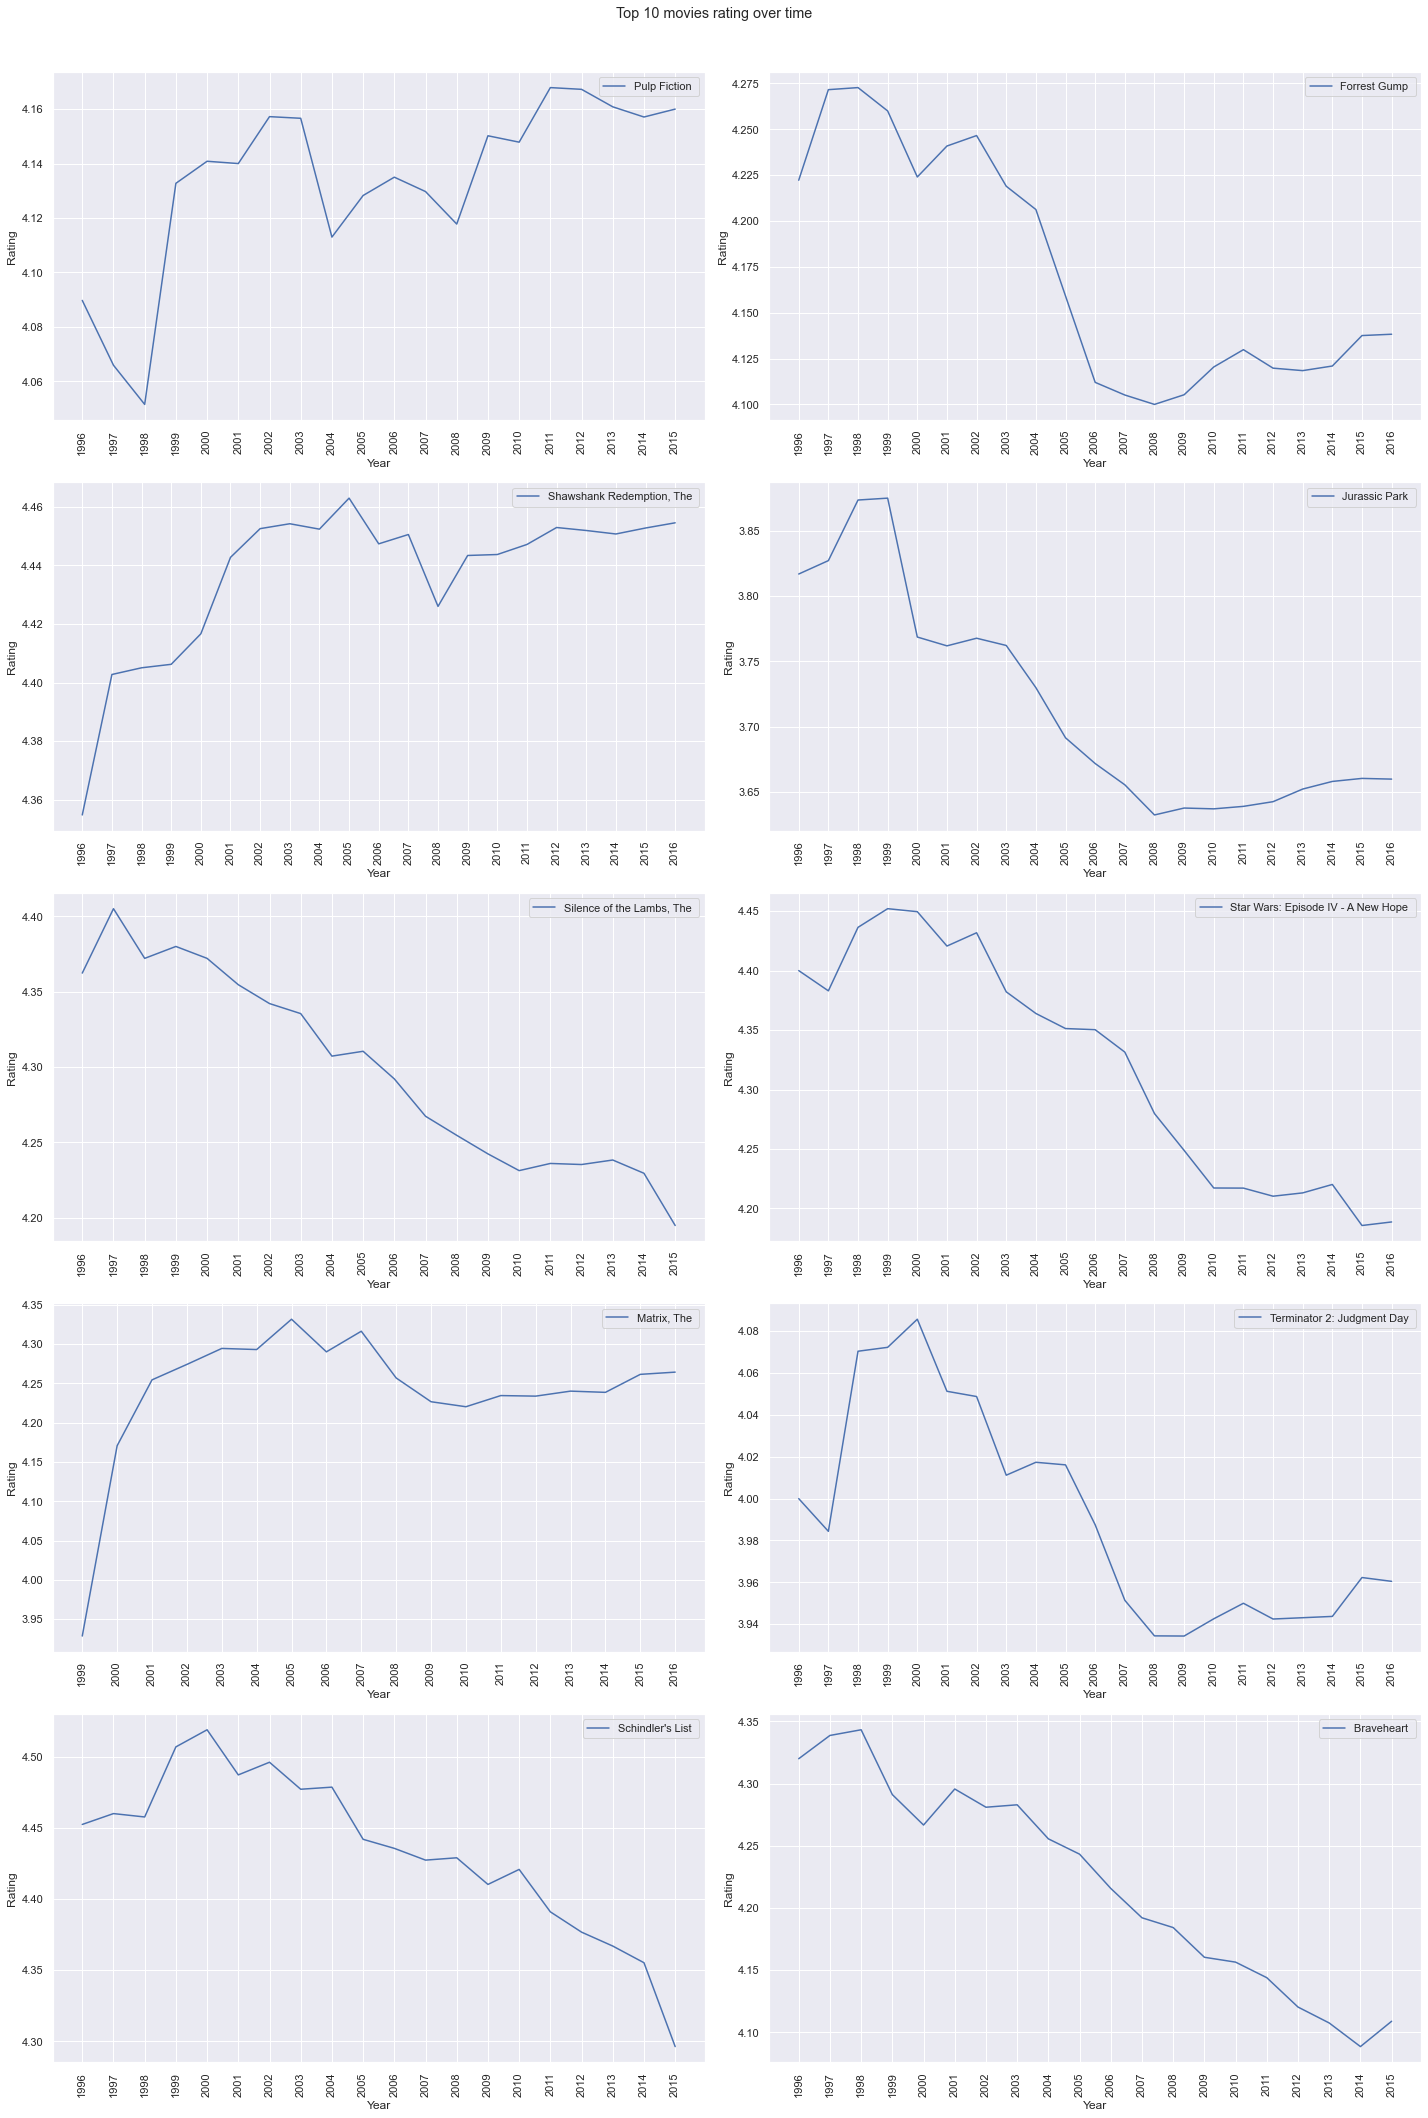

In [37]:
top_ten_movies_ids = movie_statistics.head(10).index
fig, ax = plt.subplots(5,2)
i = 0
fig.suptitle("Top 10 movies rating over time")
fig.set_figheight(30); fig.set_figwidth(20);
for movie_idx in top_ten_movies_ids:
    x = movies_data[movies_data["movieId"] == movie_idx].sort_values(by="rating_year", ascending=True)
    cum_sum = x.groupby("rating_year")["rating"].sum().cumsum()
    cum_count = x.groupby("rating_year")["rating"].count().cumsum()
    x = cum_sum / cum_count
    ax[i//2, i%2].set_xticks([i for i in range(1996,2017)],[i for i in range(1996,2017)],rotation=90)
    ax[i//2, i%2].set_xlabel("Year")
    ax[i//2, i%2].set_ylabel("Rating")
    ax[i//2, i%2].plot(x.index, x.values, label=movie_statistics.loc[movie_idx].title)
    ax[i//2, i%2].legend()
    i+=1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

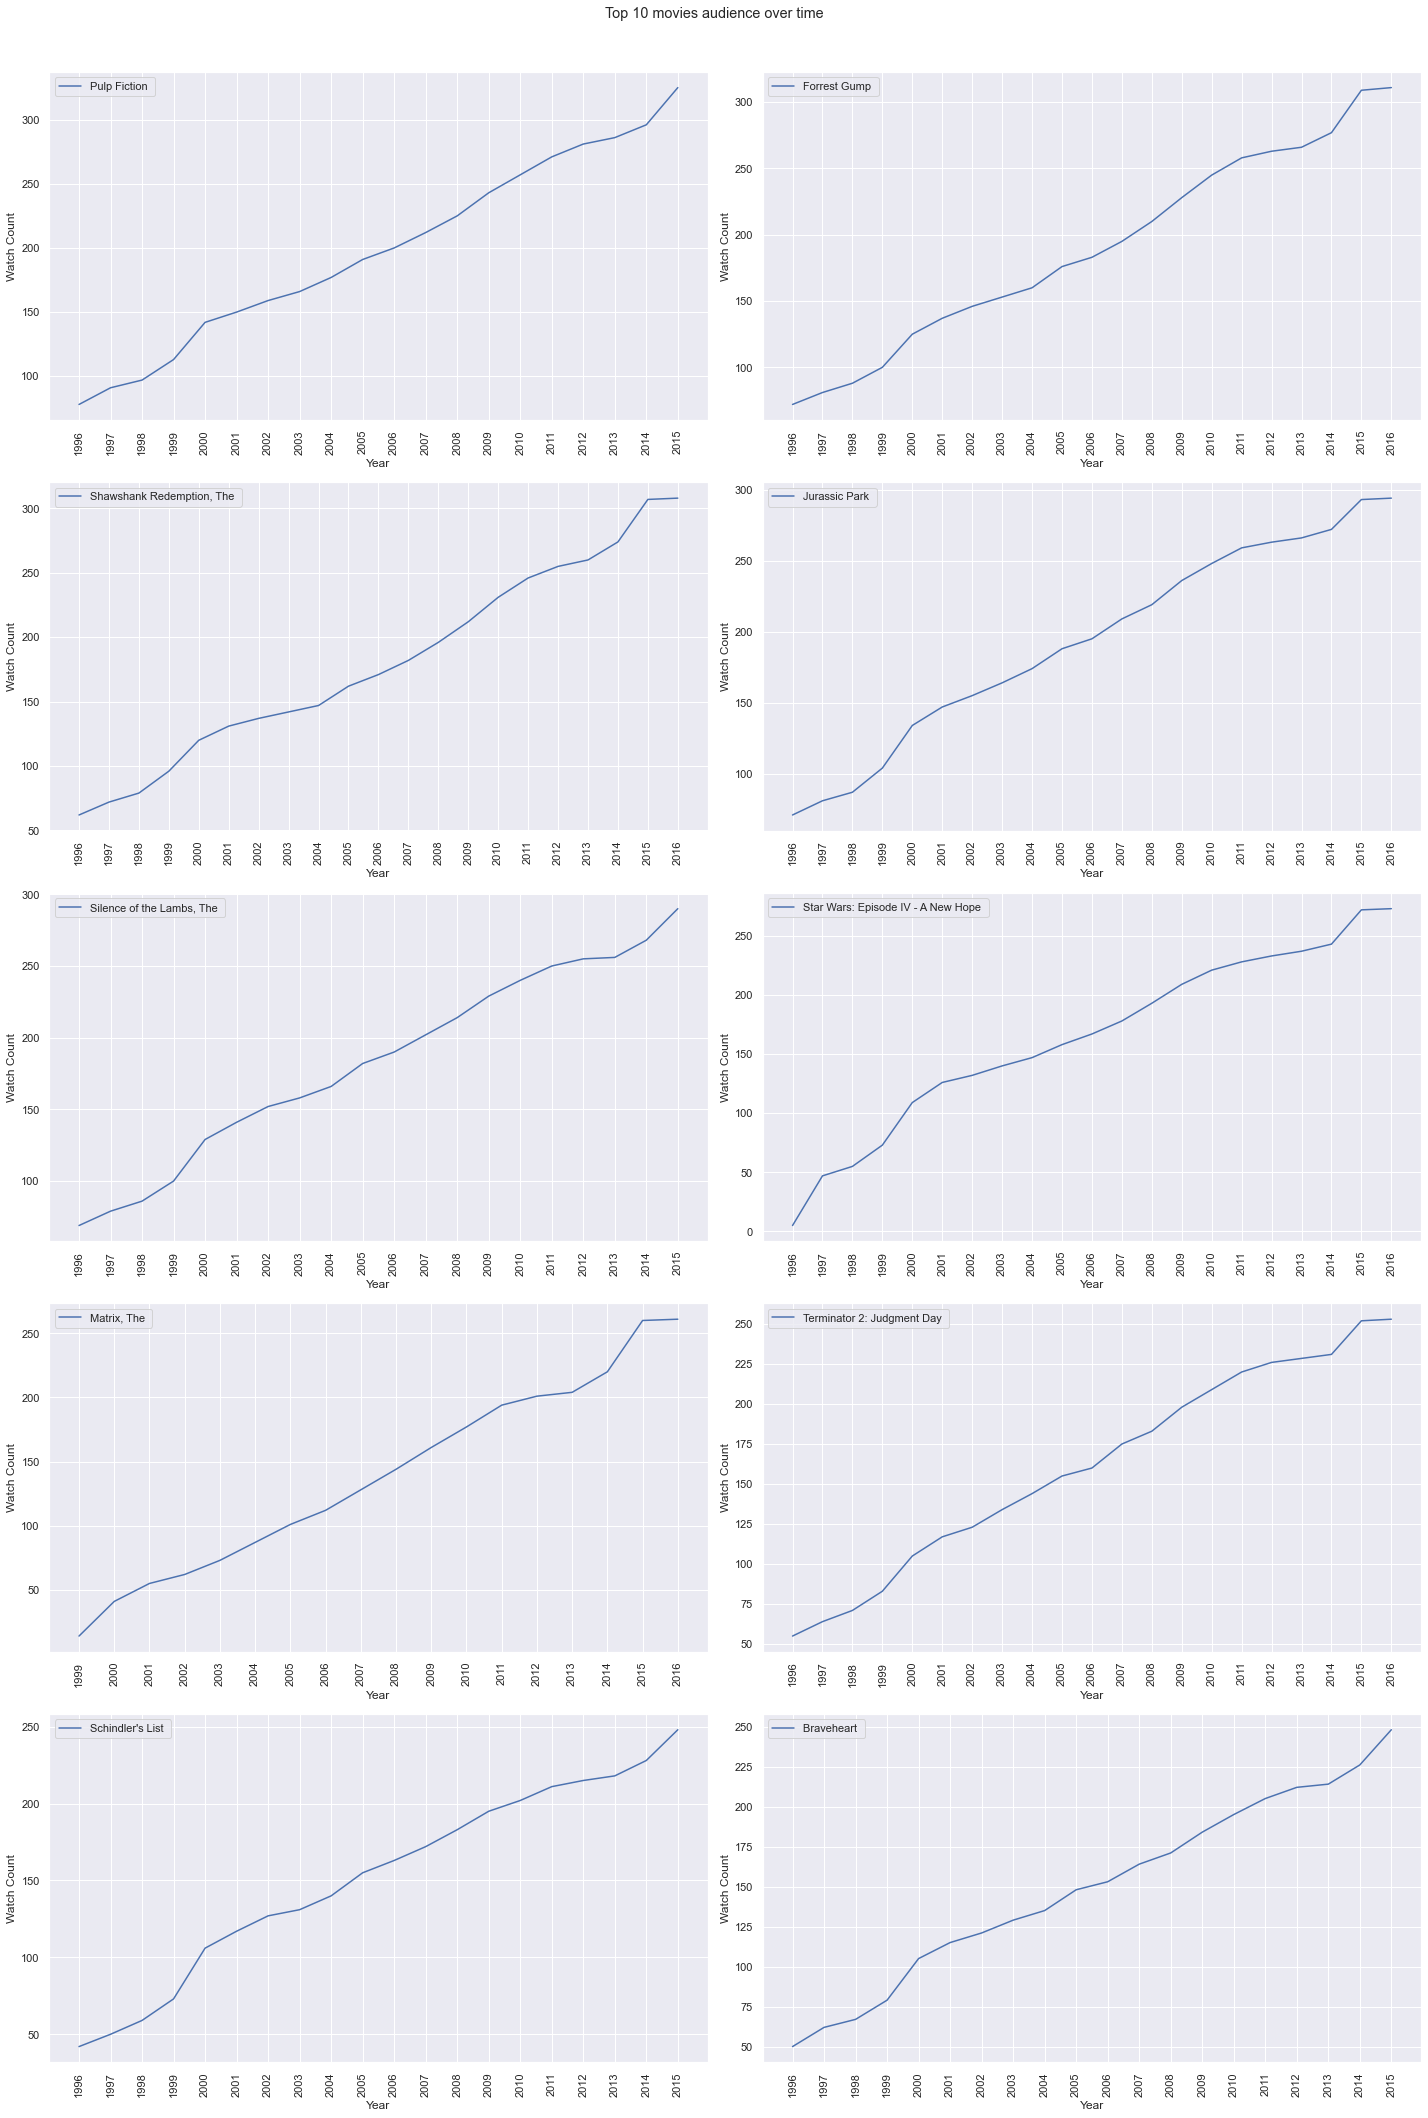

In [38]:
top_ten_movies_ids = movie_statistics.head(10).index
fig, ax = plt.subplots(5,2)
i = 0
fig.suptitle("Top 10 movies audience over time")
fig.set_figheight(30); fig.set_figwidth(20);
for movie_idx in top_ten_movies_ids:
    x = movies_data[movies_data["movieId"] == movie_idx].sort_values(by="rating_year", ascending=True)
    x = x.groupby("rating_year")["rating"].count().cumsum()
    ax[i//2, i%2].set_xticks([i for i in range(1996,2017)],[i for i in range(1996,2017)],rotation=90)
    ax[i//2, i%2].set_xlabel("Year")
    ax[i//2, i%2].set_ylabel("Watch Count")
    ax[i//2, i%2].plot(x.index, x.values, label=movie_statistics.loc[movie_idx].title)
    ax[i//2, i%2].legend()
    i+=1
fig.tight_layout()
plt.subplots_adjust(top=0.95)

In [39]:
# ratings[ratings["movieId"].isin(list(top_ten_movies_ids))].groupby("movieId")["rating"].describe().sort_values(by="count", ascending=False).join(movies, on="movieId")
# descriptive_statistics = movies.join(ratings[ratings["movieId"].isin(list(top_ten_movies_ids))].groupby("movieId")["rating"].describe(), on="movieId").dropna().sort_values(by=["count", "mean"], ascending=False)
descriptive_statistics = movies.join(movies_data.groupby("movieId")["rating"].describe(), on="movieId").dropna().sort_values(by=["count", "mean"], ascending=False)
descriptive_statistics.rename(columns={"count": "watch Counts", "mean": "average rating"}, inplace=True)
descriptive_statistics.drop(
    columns=[
        'Action',
        'Adventure',
        'Animation',
        'Children',
        'Comedy',
        'Crime',
        'Documentary',
        'Drama',
        'Fantasy',
        'Film-Noir',
        'Horror',
        'IMAX',
        'Musical',
        'Mystery',
        'Romance',
        'Sci-Fi',
        'Thriller',
        'War',
        'Western'
        ],
    inplace=True)
descriptive_statistics.head(10)

,title,year,watch Counts,average rating,std,min,25%,50%,75%,max
movieId,,,,,,,,,,
296,Pulp Fiction,1994,325.0,4.160000,0.921586,0.5,4.00,4.5,5.0,5.0
356,Forrest Gump,1994,311.0,4.138264,0.907060,0.5,3.75,4.0,5.0,5.0
318,"Shawshank Redemption, The",1994,308.0,4.454545,0.706793,0.5,4.00,5.0,5.0,5.0
480,Jurassic Park,1993,294.0,3.659864,0.924609,1.0,3.00,4.0,4.0,5.0
593,"Silence of the Lambs, The",1991,290.0,4.194828,0.812409,0.5,4.00,4.0,5.0,5.0
260,Star Wars: Episode IV - A New Hope,1977,273.0,4.188645,0.872443,0.5,4.00,4.0,5.0,5.0
2571,"Matrix, The",1999,261.0,4.264368,0.840693,0.5,4.00,4.5,5.0,5.0
589,Terminator 2: Judgment Day,1991,253.0,3.960474,0.943029,0.5,3.50,4.0,5.0,5.0
527,Schindler's List,1993,248.0,4.296371,0.917590,0.5,4.00,4.5,5.0,5.0


In [40]:
descriptive_statistics["watch Counts"].describe()

count    1064.000000
mean       60.970865
std        44.348043
min        25.000000
25%        33.000000
50%        44.000000
75%        71.000000
max       325.000000
Name: watch Counts, dtype: float64

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Braveheart '),
  Text(2, 0, 'Forrest Gump '),
  Text(3, 0, 'Jurassic Park '),
  Text(4, 0, 'Matrix, The '),
  Text(5, 0, 'Pulp Fiction '),
  Text(6, 0, "Schindler's List "),
  Text(7, 0, 'Shawshank Redemption, The '),
  Text(8, 0, 'Silence of the Lambs, The '),
  Text(9, 0, 'Star Wars: Episode IV - A New Hope '),
  Text(10, 0, 'Terminator 2: Judgment Day ')])

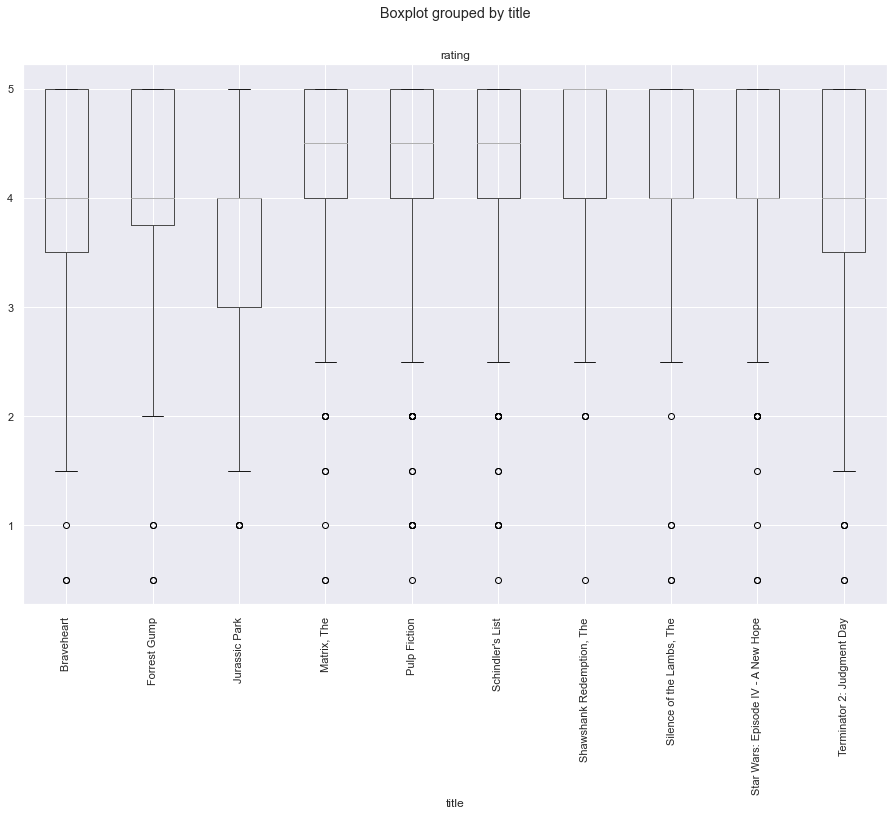

In [41]:
movies_data[movies_data["movieId"].isin(list(top_ten_movies_ids))].boxplot(column="rating", by="title", figsize=(15,10))
plt.xticks(rotation=90)

### Find relation between people's reviews and genres (Using Conjoint Analysis)

In [42]:
data = movies_data.drop(columns=["movieId", "title", "year", "rating_year", "userId"])
data.head()

,rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,4.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [43]:
# install statsmodels library if not present using pip install statsmodels
import statsmodels.api as sm
model = sm.OLS(data["rating"], data.drop(columns=["rating"])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.777e+04
Date:                Thu, 28 Apr 2022   Prob (F-statistic):                        0.00
Time:                        22:36:46   Log-Likelihood:                     -1.1938e+05
No. Observations:               64873   AIC:                                  2.388e+05
Df Residuals:                   64854   BIC:                                  2.390e+05
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Action          0.8942      0.015     59.616      0.000       0.865       0.924
Adventure       0.9953      0.016     62.511      0.000       0.964       1.026
Animation       0.1926      0.037      5.191      0.000       0.120       0.265
Children        0.6103      0.033     18.234      0.000       0.545       0.676
Comedy          1.7052      0.012    142.789      0.000       1.682       1.729
Crime           0.9699      0.017     56.456      0.000       0.936       1.004
Documentary     3.1440      0.111     28.274      0.000       2.926       3.362
Drama           2.0352      0.011    178.085      0.000       2.013       2.058
Fantasy         0.6338      0.020     31.232      0.000       0.594       0.674
Film-Noir       1.3258      0.061     21.812      0.000       1.207       1.445
Horror          1.2383      0.025     49.521      0.000       1.189       1.287
IMAX            0.3380      0.035      9.751      0.000       0.270       0.406
Musical         0.8390      0.034     24.851      0.000       0.773       0.905
Mystery         0.8010      0.023     34.232      0.000       0.755       0.847
Romance         0.8009      0.016     48.656      0.000       0.769       0.833
Sci-Fi          1.0292      0.017     62.141      0.000       0.997       1.062
Thriller        0.9238      0.015     60.696      0.000       0.894       0.954
War             0.8636      0.027     32.584      0.000       0.812       0.916
Western         1.0741      0.040     27.186      0.000       0.997       1.151
==============================================================================
Omnibus:                     1402.430   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1495.358
Skew:                          -0.372   Prob(JB):                         0.00
Kurtosis:                       2.991   Cond. No.                         17.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

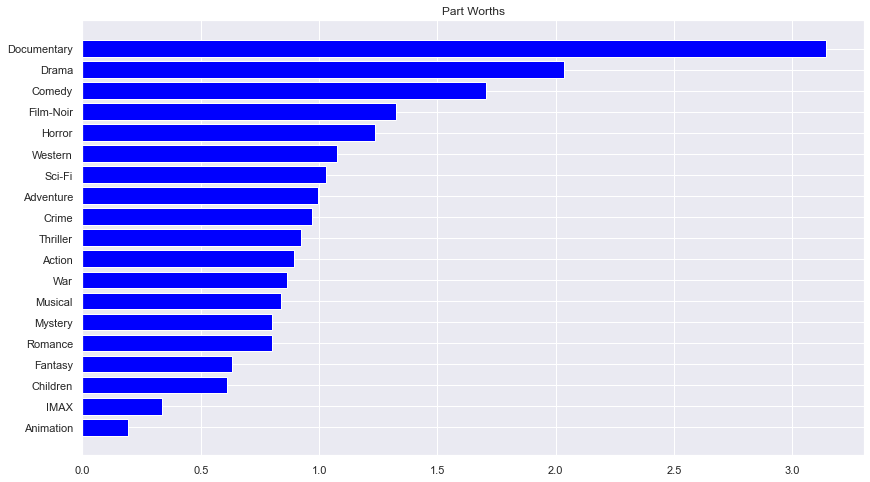

In [44]:
df_res = pd.DataFrame({
    'param_name': model.params.keys()
    , 'param_w': model.params.values
    , 'pval': model.pvalues
})
df_res['abs_param_w'] = np.abs(df_res['param_w'])
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

df_res = df_res.sort_values(by='abs_param_w', ascending=True)
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worths')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

Users Gave good reviews for documentaries, Drama, comedy and didn't prefer Animation.